# Часть I: О теореме Байеса

## 1

```Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.```

Прокурор ошибается в обоих утверждениях

1% - это шанс что случаный человек имеет такую группу крови и 99% что не имеет. 

Прокурор должен был оценить вероятность того, что обвиняемый убийца.

## 2

```Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?
```

Адвокат утверждает что подсудимый совершил убийство с вероятностью 0.01%, но 0.01% - это вероятность того что случайный человек с редкой группа крови живущий в городе - убийца.

Проблема в том что подсудимый скорее всего не является случайным человеком, и у следствия есть некие сведения о связи подозреваемого и жертвы. Предположим что у жертвы было 200 знакомых, и 1 из них убийца, т.е. вероятность того что случайный знакомый жертвы убийца = 0.5%, теперь оценим насколько совпадение редкой группы крови повышает шансы подозреваемого

УЗ - убийца знакомый
РГК - редкая группа крови

**P(УЗ|РГК) = P(РГК|УЗ) * P(УЗ) / P(РГК)** - вероятность того что один из знакомых убийца при условии того что у него редкая группа крови

P(РГК|УЗ) - вероятность того что убийца - это знакомый с редкой группой крови = 1
P(УЗ) - вероятность того что один из знакомых убийца = 1/200 = 0.005 
P(РГК) - вероятность того что у случайного знакомого редкая группа крови = 0.01

**1 * 0.005 / 0.01 = 0.5**

## 3

In [148]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression

In [2]:
def pdt(fnr, fpr, pd):
    tnr = 1 - fnr
    tpr = 1 - fpr
    pnd = 1 - pd
    
    return (tpr * pd) / (tpr * pd + fpr * pnd)

pdt(0.05, 0.05, 0.01)

0.16101694915254236

In [23]:
negatives = np.linspace(0, 0.05, 100)

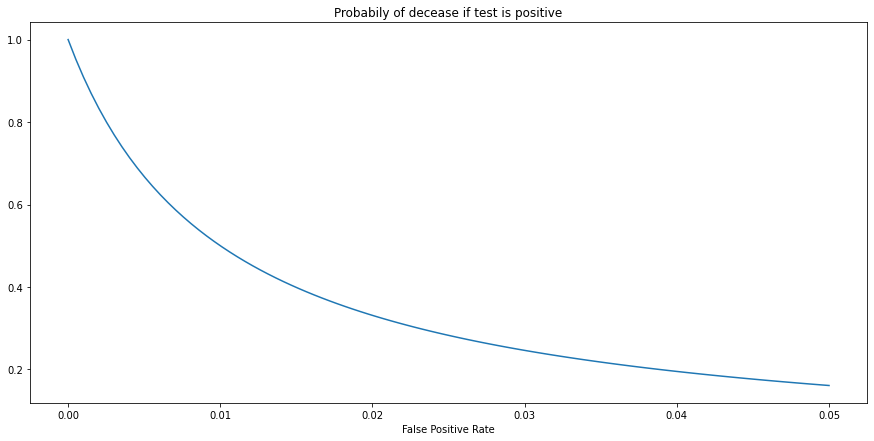

In [111]:
positive_desease_by_fpr = pdt(fnr=0.05, fpr=negatives, pd=0.01)
plt.figure(figsize=(15, 7)) 
plt.plot(negatives, positive_desease_by_fpr)
plt.title("Probabily of decease if test is positive")
plt.xlabel("False Positive Rate")
plt.show()

In [31]:
def pdnt(fnr, fpr, pd):
    tnr = 1 - fnr
    tpr = 1 - fpr
    pnd = 1 - pd
    
    return (fnr * pd) / (fnr * pd + tnr * pnd)

pdnt(0.05, 0.05, 0.01)

0.0005313496280552604

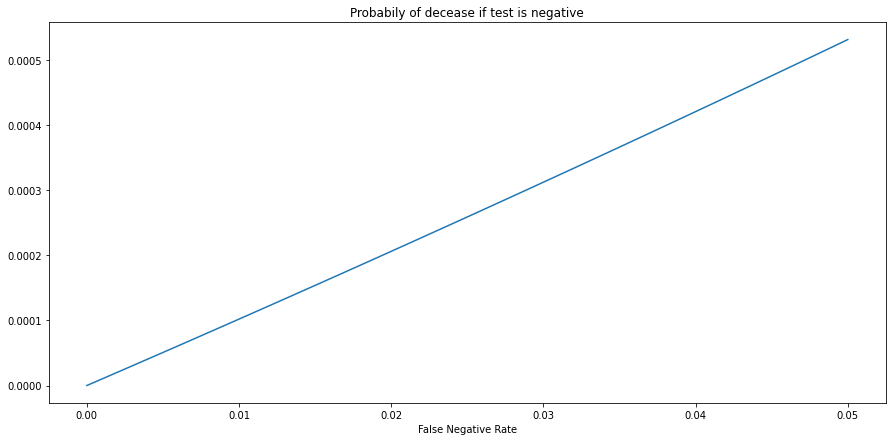

In [110]:
positive_desease_by_fnr = pdnt(fnr=negatives, fpr=0.05, pd=0.01)
plt.figure(figsize=(15, 7)) 
plt.plot(negatives, positive_desease_by_fnr)
plt.title("Probabily of decease if test is negative")
plt.xlabel("False Negative Rate")
plt.show()

Уменьшение **False Positive Rate** даст значительный прирост точности в определении заболевших.

# Часть II: О линейной регрессии

## 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [121]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
df = df[(df.iso_code == "RUS") & (df.date >= np.datetime64(datetime.date(2020, 3, 3)))].sort_values("date")
df.new_cases = df.new_cases.replace(0, 1)
df["day_number"] = range(0, 350)

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,day_number
51186,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0
51187,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1
51188,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,2
51189,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,3
51190,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51531,RUS,Europe,Russia,2021-02-11,3983031.0,14803.0,15457.286,77415.0,542.0,487.143,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,345
51532,RUS,Europe,Russia,2021-02-12,3997898.0,14867.0,15232.000,77911.0,496.0,484.429,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,346
51533,RUS,Europe,Russia,2021-02-13,4012538.0,14640.0,14983.571,78403.0,492.0,484.714,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,347
51534,RUS,Europe,Russia,2021-02-14,4026506.0,13968.0,14720.714,78825.0,422.0,485.000,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,348


In [123]:
train = df[0:50]
test = df[50:]

## 2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

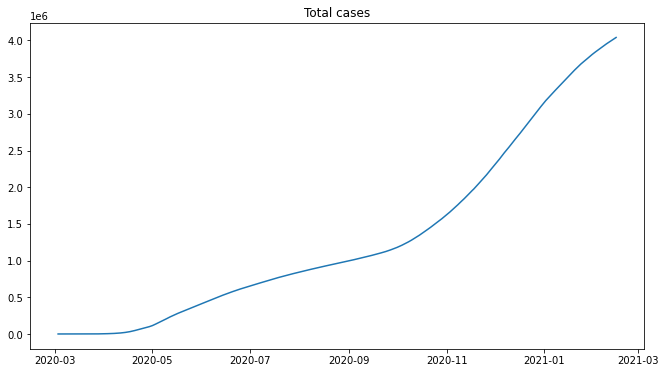

In [117]:
plt.figure(figsize=(11, 6)) 
plt.plot(df.date, df.total_cases)
plt.title("Total cases")
plt.show()

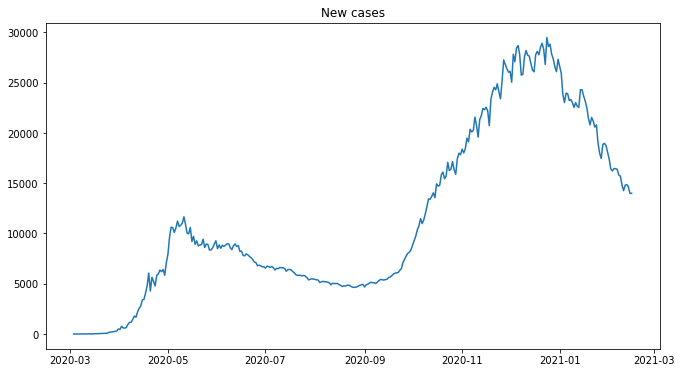

In [116]:
plt.figure(figsize=(11, 6)) 
plt.plot(df.date, df.new_cases)
plt.title("New cases")
plt.show()

### a

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [275]:
class LinearRegressionByBayes():
    def __init__(self, mu_zero, sigma_zero):
        self.mu_zero = mu_zero
        self.sigma_zero = sigma_zero

    def pad_with_ones(self, x):
        return np.hstack((np.ones((len(x), 1)), x))
    
    def fit(self, x, y):
        x = self.pad_with_ones(x)        
        w = np.linalg.inv(x.T @ x) @ x.T @ y
        
        predicted = x @ w
        noise = (y - predicted).var()
        alpha = 1 / noise
        
        self.sigma = np.linalg.inv(np.linalg.inv(self.sigma_zero) + alpha * x.T @ x)
        self.mu = self.sigma @ (np.linalg.inv(self.sigma_zero) @ self.mu_zero + alpha * x.T @ y)
        
    def predict(self, x):
        return self.pad_with_ones(x) @ self.mu
    
    def predict_samples(self, x, count=100):
        x = self.pad_with_ones(x)

        mn = np.random.multivariate_normal(self.mu, self.sigma, count)
        results = []
        for w in mn:
            y = x @ w
            results.append(y)
            
        return np.array(results)

In [332]:
x_train = np.array(train["day_number"])
x_test = np.array(test["day_number"])

y_train = np.array(train["total_cases"])
y_test = np.array(test["total_cases"])

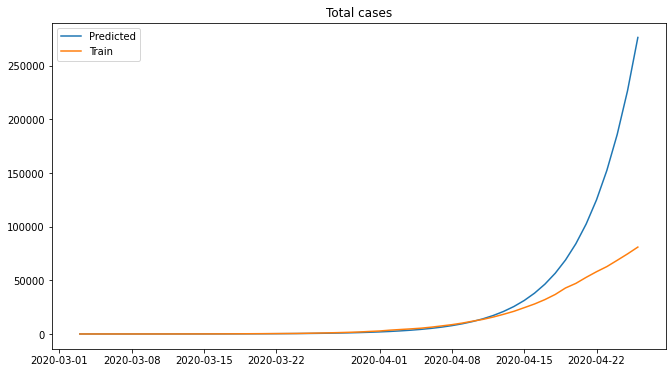

In [295]:
linear_bayes_exp_model = LinearRegressionByBayes(np.array([0, 0]), 20 * np.array([[1, 0], [0, 1]]))
linear_bayes_exp_model.fit(x_train.reshape(-1, 1), np.log(y_train))

y_train_pred = np.exp(linear_bayes_exp_model.predict(x_train.reshape(-1, 1)))
y_test_pred = np.exp(linear_bayes_exp_model.predict(x_test.reshape(-1, 1)))

test_limit = 5
train_predicted = np.exp(linear_bayes_exp_model.predict(x_train.reshape(-1, 1)))
test_predicted = np.exp(linear_bayes_exp_model.predict(x_test[0:test_limit].reshape(-1, 1)))

plt.figure(figsize=(11, 6)) 

plt.plot(
    np.hstack((train.date, test.date[0:test_limit])), 
    np.hstack((train_predicted, test_predicted[0:test_limit])),
    label="Predicted",
)

plt.plot(
    np.hstack((train.date, test.date[0:test_limit])), 
    np.hstack((train.total_cases, test.total_cases[0:test_limit])),
    label="Train",
)

plt.title("Total cases")
plt.legend()
plt.show()

### b

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

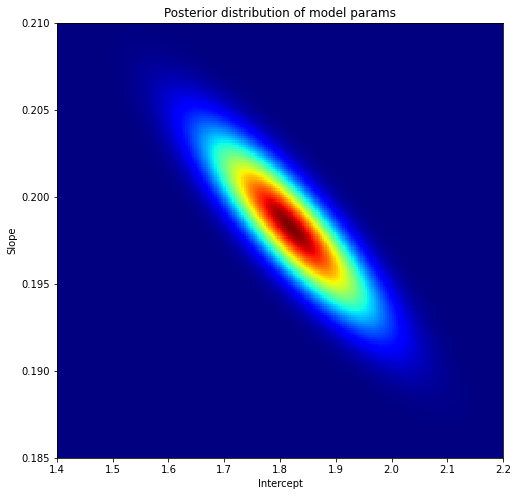

In [308]:
points = 200

plot_lims = (
    (1.4, 2.2),
    (0.185, 0.21)
)

x = np.linspace(*plot_lims[0], points)
y = np.linspace(*plot_lims[1], points)

x, y = np.meshgrid(x, y)
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

Z = multivariate_normal.pdf(pos, mean=linear_bayes_exp_model.mu, cov=linear_bayes_exp_model.sigma)

plt.figure(figsize=(8, 8))
plt.xlim(plot_lims[0])
plt.ylim(plot_lims[1])
plt.pcolormesh(x, y, Z, cmap=plt.cm.jet, shading="auto")
plt.title('Posterior distribution of model params')
plt.xlabel("Intercept")
plt.ylabel("Slope")
plt.show()

### c

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

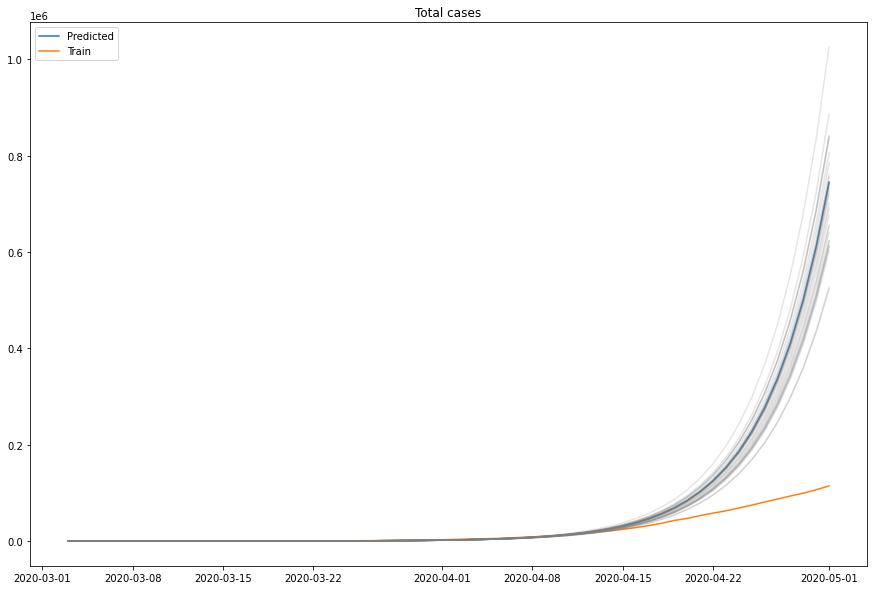

In [350]:
subset = df[0:60]
x_subset = np.array(subset["day_number"]).reshape(-1, 1)

plt.figure(figsize=(15, 10)) 
plt.plot(subset.date, np.exp(linear_bayes_exp_model.predict(x_subset)), label="Predicted")
plt.plot(subset.date, subset.total_cases, label="Train")

n_samples = 30
samples = np.exp(linear_bayes_exp_model.predict_samples(x_subset, n_samples))

for i in range(n_samples):
    plt.plot(
        subset.date,
        samples[i],
        alpha=0.2,
        color='gray'
    )
    
plt.title("Total cases")
plt.legend()
plt.show()

In [318]:
key_dates = df[(df.date == "2020-05-01") | (df.date == "2020-06-01") | (df.date == "2020-09-01")][["day_number", "date"]]
key_dates

,day_number,date
51245,59,2020-05-01
51276,90,2020-06-01
51368,182,2020-09-01


'Total sampled cases on 2020-05-01 00:00:00 is 744605.0'

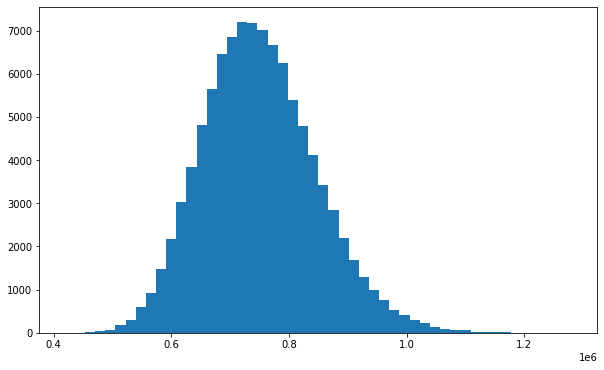

'Total sampled cases on 2020-06-01 00:00:00 is 348404230.0'

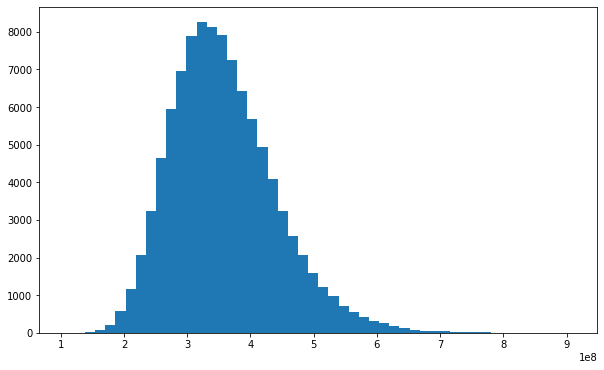

'Total sampled cases on 2020-09-01 00:00:00 is 2.91679056046558e+16'

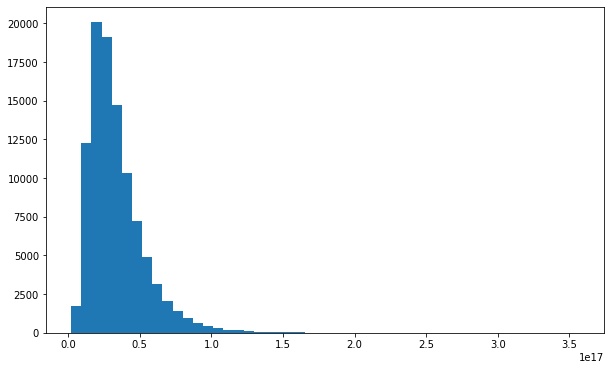

In [319]:
def sample_for_day(row):
    sampled_preds = np.exp(
        linear_bayes_exp_model.predict_samples(np.array([[row["day_number"]]]), 100000).flatten()
    )

    display(f"Total sampled cases on {row['date']} is {np.median(sampled_preds).round()}")
    plt.figure(figsize=(10, 6)) 
    plt.hist(sampled_preds, bins=50)
    plt.show()    
    
for _, row in key_dates.iterrows():
    sample_for_day(row)

# 3

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:
Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

## a

Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Сумма значений new_cases равна total_cases, если мы моделируем total_cases функцией нормального распределения (проинтегрированная плотность распределения), то мы так же можем смоделировать переменную new_cases плотностью нормального распределения с теми же параметрами. И потом просто аккумулировать предсказания по new_cases, чтобы получить total_cases.

Для того, чтобы обучиться под плотность нормального распределения (экспоненту квадратичной функции) линейной регрессией, обучим полином 2 степени от логарифма таргета.

y = e^(ax^2 + bx + c)

ln(y) = ax^2 + bx + c

## b

Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [323]:
y_train_new = np.array(train["new_cases"])
y_test_new = np.array(test["new_cases"])

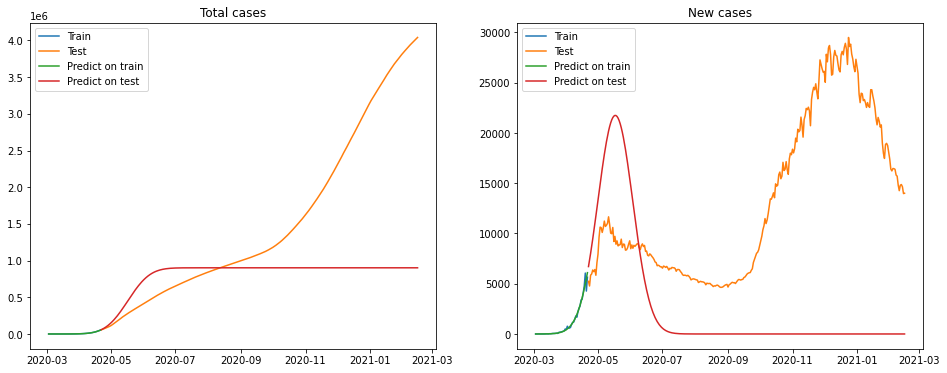

In [360]:
x_train2 = np.array([x_train, (x_train) ** 2]).T
x_test2 = np.array([x_test, (x_test) ** 2]).T

sigmoid_model = LinearRegressionByBayes(
  np.array([0, 0, 0]), 
  10 * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
)

sigmoid_model.fit(x_train2, np.log(y_train_new))

c, b, a = sigmoid_model.mu
mu_dist = -b / (2 * a)

y_train_new_sigmoid = np.exp(sigmoid_model.predict(x_train2))
y_test_new_sigmoid = np.exp(sigmoid_model.predict(x_test2))

y_train_total_sigmoid = y_train_new_sigmoid.cumsum()
y_test_total_sigmoid = y_train_total_sigmoid.max() + y_test_new_sigmoid.cumsum()

fig, axis = plt.subplots(1, 2, figsize=(16, 6))

axis[0].plot(train["date"], y_train, label="Train")
axis[0].plot(test["date"], y_test, label="Test")
axis[0].plot(train["date"], y_train_total_sigmoid, label="Predict on train")
axis[0].plot(test["date"], y_test_total_sigmoid, label="Predict on test")
axis[0].set_title("Total cases")
axis[0].legend()

axis[1].plot(train["date"], y_train_new, label="Train")
axis[1].plot(test["date"], y_test_new, label="Test")
axis[1].plot(train["date"], y_train_new_sigmoid, label="Predict on train")
axis[1].plot(test["date"], y_test_new_sigmoid, label="Predict on test")
axis[1].set_title("New cases")
axis[1].legend()

plt.show();

## c

Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

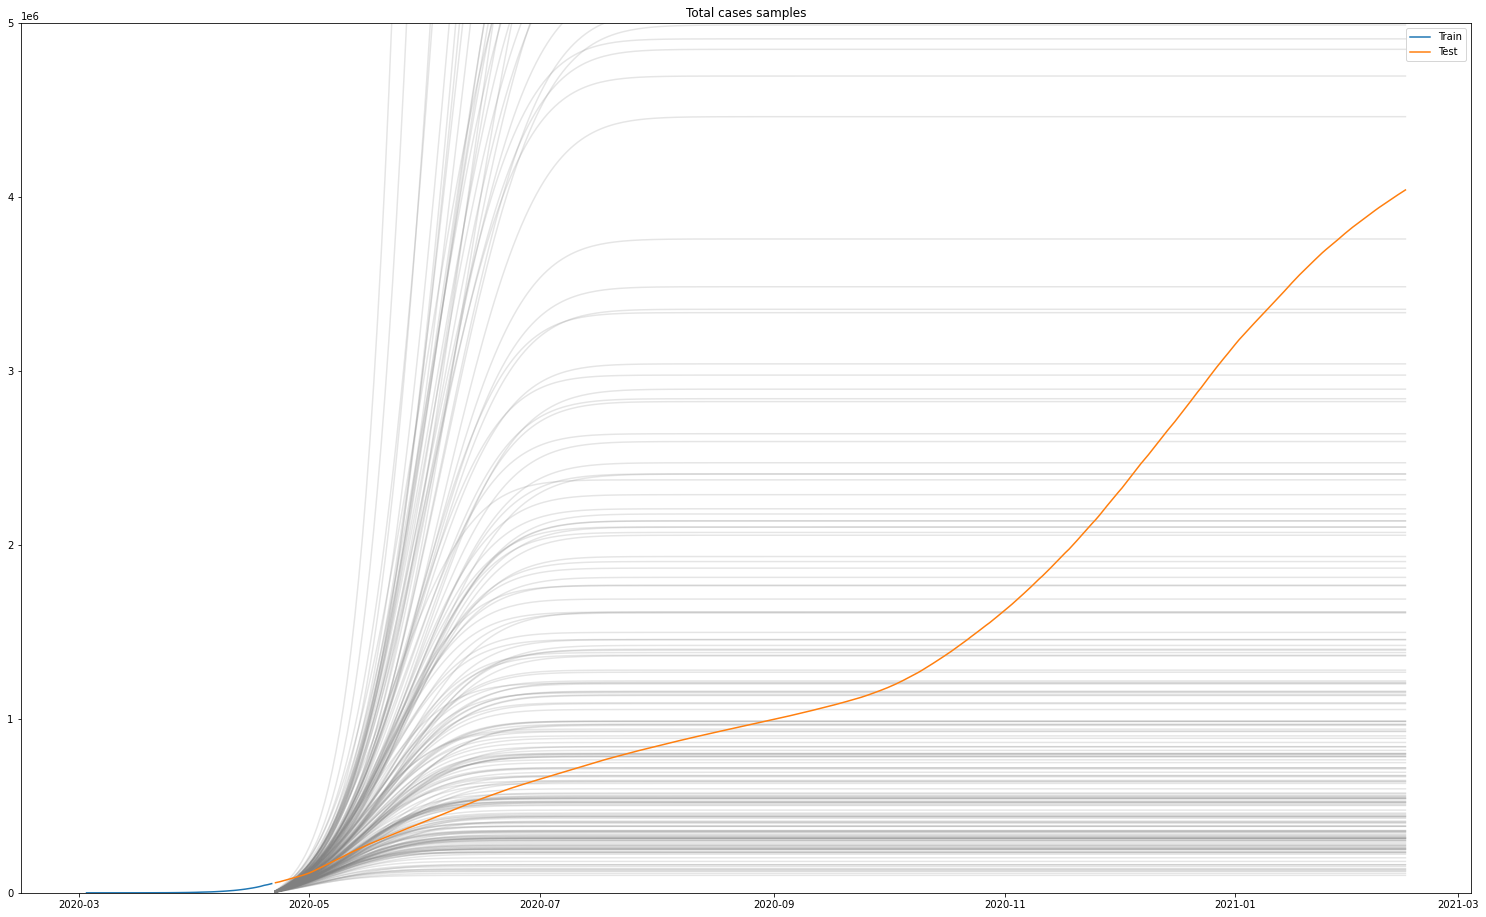

In [375]:
y_samples = np.exp(sigmoid_model.predict_samples(x_test2, 200)).cumsum(axis=1)

for y_sample in y_samples:
    plt.plot(test["date"], y_sample, alpha=0.2, color='gray')
    
plt.plot(train["date"], y_train, label="Train")
plt.plot(test["date"], y_test, label="Test")
plt.ylim((0, 5_000_000))
plt.title("Total cases samples")
plt.legend();
plt.show()

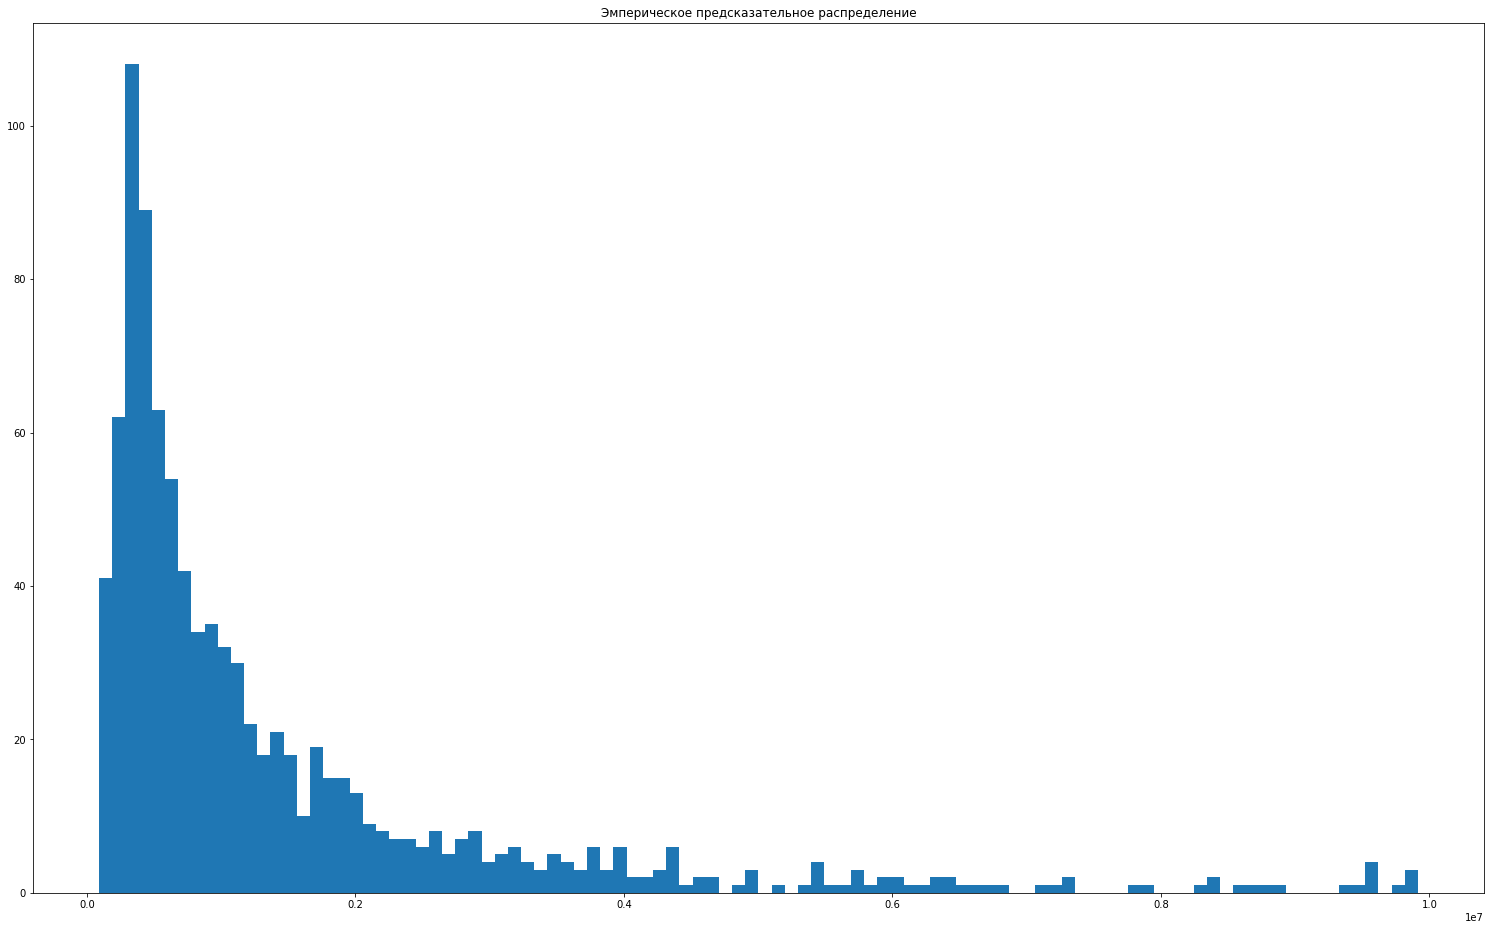

In [381]:
y_samples = np.exp(sigmoid_model.predict_samples(x_test2, 1000)).cumsum(axis=1)[:, -1]
plt.hist(y_samples[y_samples < 10_000_000], bins=100)
plt.title('Эмперическое предсказательное распределение');

In [385]:
print("Optimiitic p10 forecast:", round(np.percentile(y_samples, 10)))
print("Pessimistic p90 forecast:", round(np.percentile(y_samples, 90)))

Optimiitic p10 forecast: 277537
Pessimistic p90 forecast: 6531492
